# Analytics With Seaborne

<!-- #                by 
<h1><span style="color:blue">Bukunmi Adebanjo</span><h1> -->
    
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<!-- <h3>This current notebook is organised into the following sections:<h3>
 
- [Introduction](#intro)

- [Univariate Exploration](#uni)

- [Bivariate Exploration](#bi)

- [Multivariate Exploration](#multi) -->



## Introduction

This project explores the individual rides in a bike-sharing system spanning the larger San Francisco Bay area included in the 'fordgobike-tripdata' dataset of over 180,000 records.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb



In [ ]:
#loading th dataset into a pandas dataframe

df = pd.read_csv(r'https://video.udacity-data.com/topher/2023/July/64ac0039_fordgobike-tripdata/fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
#making my copy of the original data set
bikeshare = df.copy()

#dropping rows containing null values from the data set
rows_to_drop = list(bikeshare[bikeshare.isna().any(axis=1)].index)

bikeshare = bikeshare.drop(rows_to_drop)

In [6]:
#dropping columns that wouldn't be relevant to my eplanatory analysis project
bikeshare = bikeshare.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis = 1)

In [7]:
#converting some variables to a more appropriate data type 
def converter():
    bikeshare.bike_id = bikeshare.bike_id.astype(int)
    bikeshare.member_birth_year = bikeshare.member_birth_year.astype(int)
    bikeshare.start_station_id = bikeshare.start_station_id.astype(int)
    bikeshare.end_station_id = bikeshare.end_station_id.astype(int)
    bikeshare.member_gender = bikeshare.member_gender.astype('category')
    bikeshare.user_type = bikeshare.user_type.astype('category')
    bikeshare.start_time = pd.to_datetime(bikeshare.start_time)
    bikeshare.end_time = pd.to_datetime(bikeshare.end_time)
    
converter()

In [8]:
print(bikeshare.shape)
print(bikeshare.dtypes)

(174952, 11)
duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id               int64
start_station_name            object
end_station_id                 int64
end_station_name              object
bike_id                        int64
user_type                   category
member_birth_year              int64
member_gender               category
dtype: object


In [9]:
bikeshare.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### What is the structure of your dataset?

There are approximately 175,000 bike rides in this data set with 11 trip attributes
(duration_sec,
start_time,
end_time,
start_station_id, 
start_station_name,
end_station_id,
end_station_name,
bike_id,
user_type,
member_birth_year,
member_gender ). The `member_gender` and `user_type` features are categorical variables. Numeric data types are more dominant in the data set with 5 variables being integer values. 

### What is/are the main feature(s) of interest in your dataset?

- I'm interested in the time it takes for an average trip to be completed.

- If any particular gender spends more time than the other on trips.

- Another area of interest is the relationship between user_type and member_gender.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- I expect `the duration_sec` variable will be of great importance in understanding average time duration for trips.

- Variables such as the user_type, member_gender,member_birth_year will also help in exploring relationships.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Univariate Exploration

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

-  **I will start by taking a look at some variables of interest.**

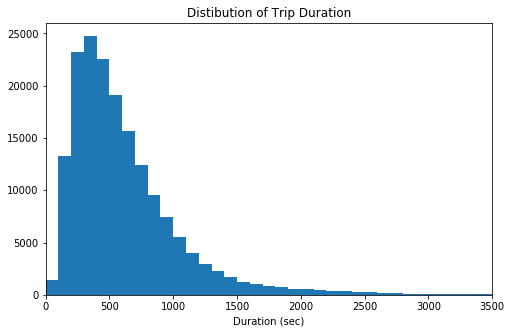

In [ ]:
binsize = 100
bins = np.arange(0, bikeshare['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare, x = 'duration_sec', bins = bins);
plt.xlabel('Duration (sec)')
plt.title('Distibution of Trip Duration')
plt.xlim(0,3500);

Duration distribution comment 1: <span style="color:red">The distribution of the duration variable has a long tail and it is rightly-skewed.</span>

Duration distribution comment 2: <span style="color:red">Finding the right bin size for this ditribution took a while. Reducing it to minutes or hours will be a good idea for me to explore.</span>

In [ ]:
#converting the duration variable from seconds to minutes

bikeshare['duration_min'] = np.round((bikeshare.duration_sec/ 60),2)
bikeshare = bikeshare.drop('duration_sec' , axis = 1)

In [ ]:
bikeshare.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,869.75
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,1030.90
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,608.17
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,26.42
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,29.88


In [ ]:
#taking a look at the log distribution of duration to help determine a suitable bin size
np.log(bikeshare['duration_min']).describe()

count    174952.000000
mean          2.140649
std           0.702727
min           0.019803
25%           1.682688
50%           2.140066
75%           2.576422
max           7.250728
Name: duration_min, dtype: float64

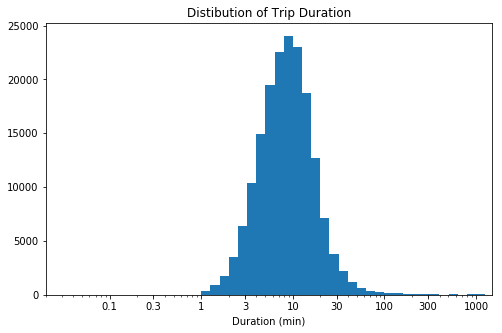

In [ ]:
#log transformation plot
binsize2 = 0.1
bins = 10 ** np.arange(0,np.log(bikeshare['duration_min'].max())+binsize2 , binsize2)
ticks =  [0.1, 0.3, 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]


plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')
plt.title('Distibution of Trip Duration')
plt.xlim(0.02,1500);

Duration distribution comment 3: <span style="color:red">
A log scale plot helps to view the distrbution more closely, there seems to be a few data points greater than where majority of the distribution lies(1- 100 minutes). An observed peak is seen at 10 minutes.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **I will proceed to take a look at the `user_type` variable. Particulary, I will explore the distribution of user types across the data set.**

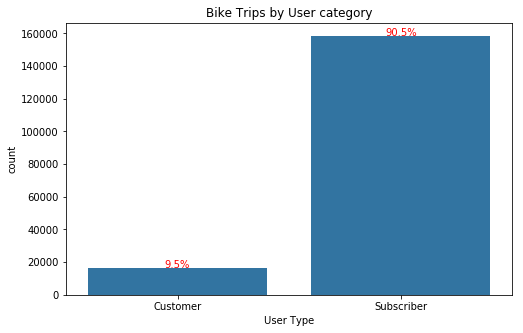

In [ ]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])

sb.countplot(data = bikeshare, x = 'user_type', color = base_color)


# percentage lable on the bar chart
n_trips = bikeshare.shape[0]
user_counts = bikeshare['user_type'].value_counts()
locs, labels = plt.xticks()  


for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    percentage = '{:0.1f}%'.format(100*count/n_trips)
    plt.text(loc, count-8, percentage, ha='center', color='r')
    
plt.title('Bike Trips by User category')
plt.xlabel('User Type');


Category distribution comment 1: <span style="color:red">
A majority of trips were done by subscribers (90.5%) while `customer category` accounts for below 10% of the trips taken.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **Next is to explore the start_time and end_time variables. Particularly I want to understand the start time and end time distribution of trips between hours of the day, I want to check for similarities in peak periods if any.**

In [ ]:
#extracting the starting hour and ending hour of each trip to understand trip distrbution per hour of the day
bikeshare['start_time_hr'] = bikeshare['start_time'].dt.time.astype(str)
bikeshare['end_time_hr'] = bikeshare['end_time'].dt.time.astype(str)


bikeshare['start_time_hr'] = bikeshare['start_time_hr'].str[0:2]
bikeshare['end_time_hr'] = bikeshare['end_time_hr'].str[0:2]

In [ ]:
bikeshare.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,start_time_hr,end_time_hr
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,869.75,17,08
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,1030.90,12,05
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,608.17,17,04
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,26.42,23,00
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,29.88,23,00


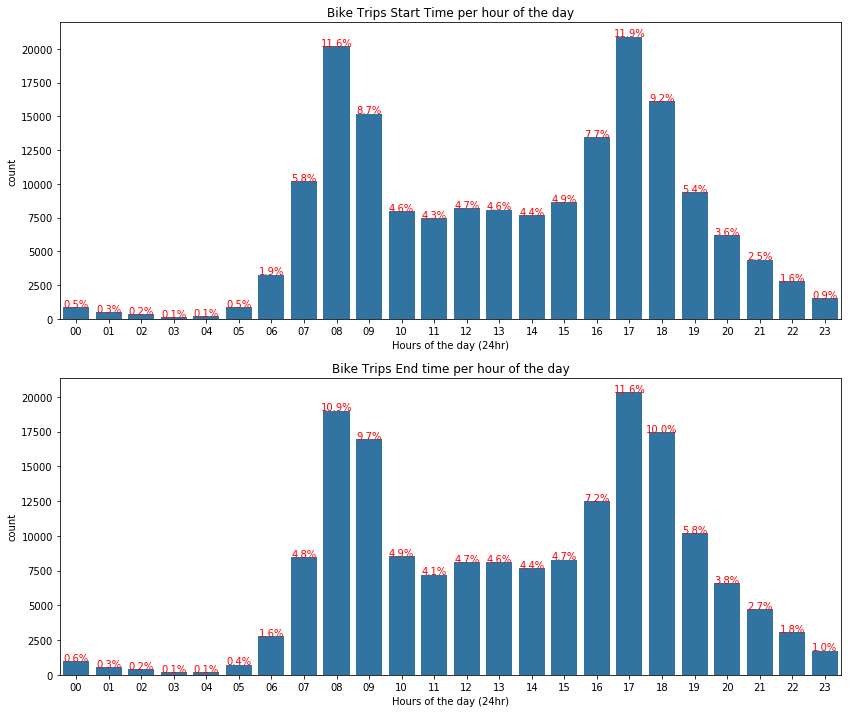

In [ ]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [14, 12])
plt.subplot(2, 1, 1)
sb.countplot(data = bikeshare, x = 'start_time_hr', color = base_color)

# percentage lable on the bar chart
n_trips = bikeshare.shape[0]
user_counts = bikeshare['start_time_hr'].value_counts()
locs, labels = plt.xticks()  


for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    percentage = '{:0.1f}%'.format(100*count/n_trips)
    plt.text(loc, count-8, percentage, ha='center', color='r')
    
plt.title('Bike Trips Start Time per hour of the day')
plt.xlabel('Hours of the day (24hr)');

plt.subplot(2, 1, 2)

sb.countplot(data = bikeshare, x = 'end_time_hr', color = base_color)

# percentage lable on the bar chart
n_trips = bikeshare.shape[0]
user_counts = bikeshare['end_time_hr'].value_counts()
locs, labels = plt.xticks()  


for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    percentage = '{:0.1f}%'.format(100*count/n_trips)
    plt.text(loc, count-8, percentage, ha='center', color='r')
    
plt.title('Bike Trips End time per hour of the day')
plt.xlabel('Hours of the day (24hr)');


Hourly distribution comment 1: <span style="color:red">Both distributions appears bimodal whereby peak periods are observed at 8am and 9am as well as 5pm to 6pm with the most busy period recorded at 5pm for the start time. The trip end time also mimics the start time distrbution with a peak period of 5pm as well.  </span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **What gender is predominant in larger San Francisco Bay area when it comes to bike trips? Let me take a look at this.**

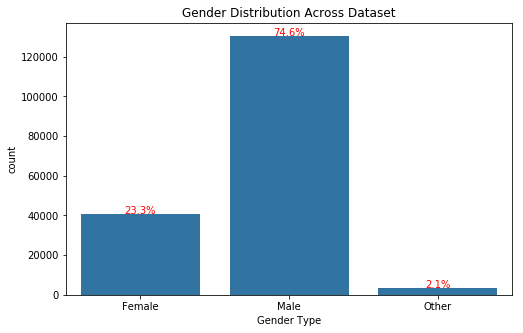

In [ ]:
#plotting age distribution
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])

sb.countplot(data = bikeshare, x = 'member_gender', color = base_color)


# percentage lable on the bar chart
n_trips = bikeshare.shape[0]
user_counts = bikeshare['member_gender'].value_counts()
locs, labels = plt.xticks()  


for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    percentage = '{:0.1f}%'.format(100*count/n_trips)
    plt.text(loc, count-8, percentage, ha='center', color='r')
    
plt.title('Gender Distribution Across Dataset')
plt.xlabel('Gender Type');

Gender distribution comment 1: <span style="color:red">As seen above, the male gender appears to take more bike trips than the female and other gender categories present in the dataset. More than half(75%) of the bike trips were actioned by men and less than 3% belong to the other gender category.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **Another variable of interest is the `member_birth_year`. With this variable I can take a look at the age distribution if trips within the dataset.**

In [ ]:
#writing a function to help extract age from the 'member birth year' variable
from datetime import date

def extract_age(dates):
    today = date.today()
    return today.year - dates

bikeshare['member_age'] = bikeshare.member_birth_year.map(extract_age)

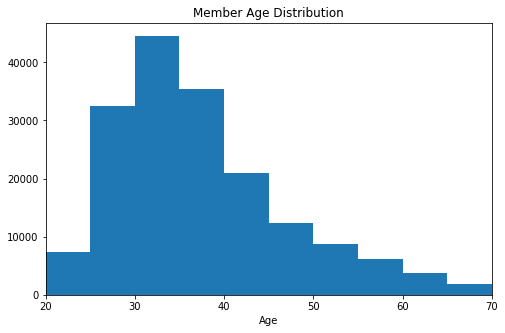

In [ ]:
plt.figure(figsize=[8, 5])

binsize = 5
bins = np.arange(0, bikeshare['member_age'].max()+binsize, binsize)

plt.hist(data = bikeshare, x = 'member_age', bins = bins)


plt.xlim(20, 70)
plt.xlabel('Age')
plt.title('Member Age Distribution');

Member age distribution comment 1: <span style="color:red">A right-skewed distribution is observed for the age variable with a peak between the ages of 30 to 35.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- Stations should experience more activity in comparison to each other. Patricularly I want to see the busiest stations in reference to start and end trips.

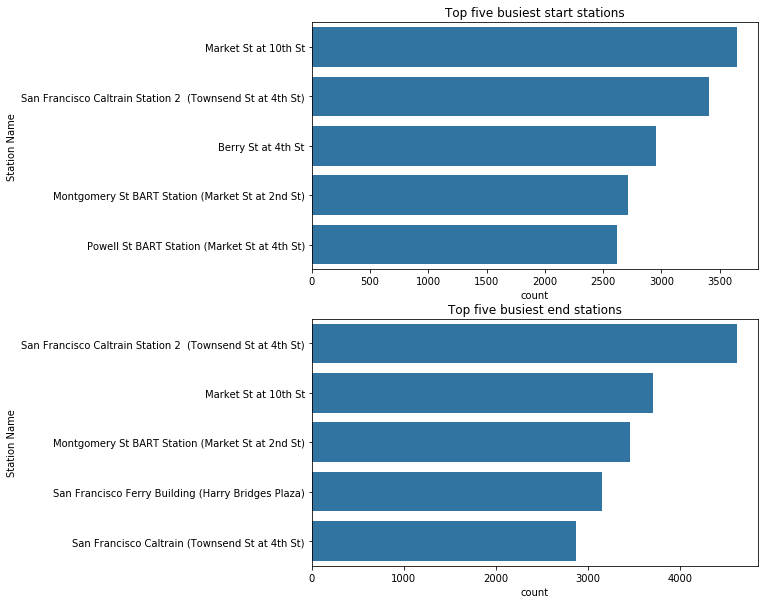

In [ ]:
#setting color palette and figure size for the plots
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 10])

#Creation of plot for top five busiest bike starting stations
plt.subplot(2, 1, 1)

station_order = bikeshare['start_station_name'].value_counts().iloc[:5].index
sb.countplot(data = bikeshare, y = 'start_station_name', color = base_color, order = station_order)


    
plt.title('Top five busiest start stations')
plt.ylabel('Station Name')

#Creation of plot for top five busiest bike starting stations
plt.subplot(2, 1, 2)

station_order = bikeshare['end_station_name'].value_counts().iloc[:5].index
sb.countplot(data = bikeshare, y = 'end_station_name', color = base_color, order = station_order)


    
plt.title('Top five busiest end stations')
plt.ylabel('Station Name');

Busiest stations comment 1: <span style="color:red">The top two busiest end stations are 'San Francisco Caltrain Station 2' and 'Market St at 10th St' with both of them switching postions for the start station. Considering the whole dataset, San Francisco Caltrain Station 2 is busiest bike station. </span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

`DRURATION('duration_sec')`
- <span style="color:blue">The duration variable initially had large range pof values due to it being in seconds, a conversion to minutes helped me see things a little bit more clearly.</span>
- <span style="color:blue">The duration variable followed a long-tialed distribution so I had to perform a log tranformation to the 'X' variable for a better drilled-down view of the distribution.</span>

`USER CATEGORY('user_type')`
- <span style="color:blue">The duration variable followed a long-tialed distribution so I had to perform a log tranformation to the 'X' variable for a better drilled-down view of the distribution.</span>

`TIME('start_time','end_time')`
- <span style="color:blue">Both variables mimic same ditribution pattern. Peak hours are present in both the first and second half of each day with the second half of the day recording the highest percentage trip activity.</span>

`GENDER('member_gender')`
- <span style="color:blue">This variable followed an expected distrbution flow with 'males' being the predominant gender type.</span>



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

`DRURATION('duration_min')`
- <span style="color:blue">The duration variable initially had large range of values due to it being in seconds, a conversion to minutes helped me see things a little bit more clearly. This further helped determine a better bin size to apply.</span>

`TIME('start_time','end_time')`
- <span style="color:blue">I engineered the `start_time_hr` and `end_time_hr` variables to help visualise the distribution of trips by hours of the day.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Bivariate Exploration<a id='bi'></a>


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **I start my bivariate explorations by exploring the relationship between trip duration and gender category as well as trip duration against user type category**

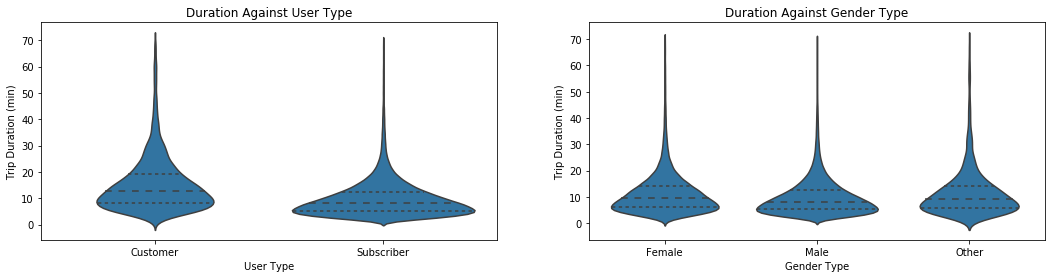

In [23]:
# scatter plot of duration vs user type
sample = bikeshare[bikeshare['duration_min'] < 70]
base_color = sb.color_palette()[0]
plt.figure(figsize = [18, 4])

#Plot relationship between duration and user category
plt.subplot(1, 2, 1)

sb.violinplot(data= sample, x = 'user_type', y = 'duration_min', color=base_color, inner='quartile')


plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Type')

#Plot relationship between duration and gender type
plt.subplot(1, 2, 2)

sb.violinplot(data= sample, x = 'member_gender', y = 'duration_min', color=base_color, inner='quartile')


plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against Gender Type');


>> <span style="color:red">A majority of the subscriber category members' travel duration fall within the range of 1 to 10 minutes with over 50% falling below 10 minutes. The customer category have slightly over 25% of them with trip durations lower than 10 minutes while the rest fall above the 10 minutes cap. A more spreadout trip duration distribution is obeserved in the customer category type.</span>     
>> <span style="color:green">The 'male', 'female' and 'other' gender types show similiar relationships with the trip duration variable regardless of their respective size.</span>  `

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **Next is to inspect the relationship between age distibution and trip duration**

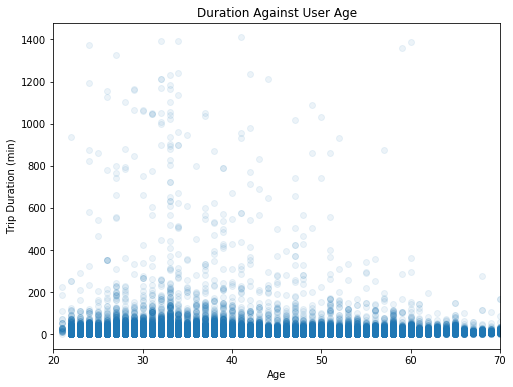

In [24]:
#Plotting of Trip Duration against age
plt.figure(figsize = [8, 6])
plt.scatter(data = bikeshare, x = 'member_age', y = 'duration_min', alpha = 1/12)
plt.xlabel('Age')
plt.xlim(20, 70)

plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age');

>> <span style="color:red">A general overview shows that the older age distribution seldom embark on longer trips as opposed to the younger ages. Age group 33 shows the strongest relationship with the most people of this age group embarking on longer trips.</span> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **Is there a relationship between the trip durations and the hour the day people start their trips or time of the day members end their trips? I will inspect this using the a plot of trip duration against start hour and end hour variables.**

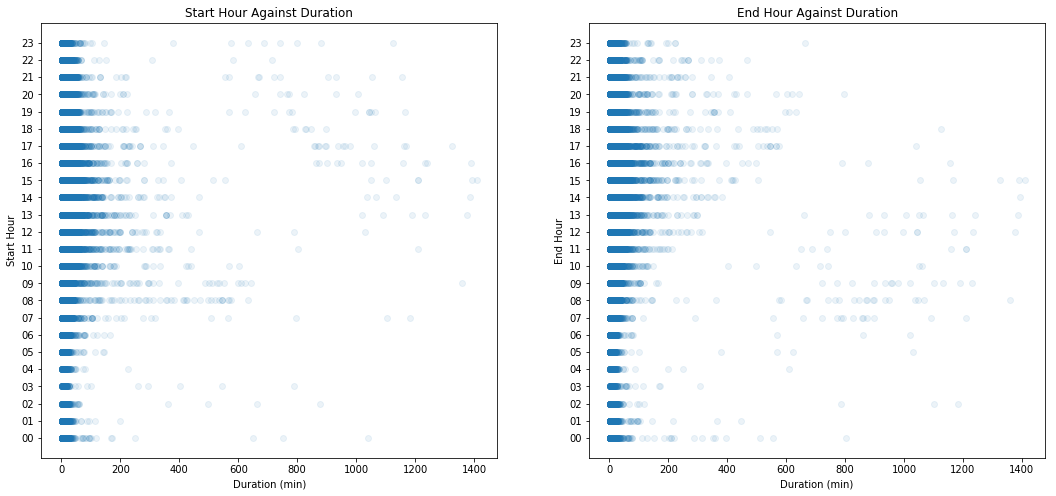

In [25]:
plt.figure(figsize = [18, 8])


#Plot relationship between duration and start time
plt.subplot(1, 2, 1)
plt.scatter(data = bikeshare, y = 'start_time_hr', x = 'duration_min', alpha = 1/12)
plt.ylabel('Start Hour')
plt.xlabel('Duration (min)')
plt.title('Start Hour Against Duration')

#Plot relationship between duration and end time
plt.subplot(1, 2, 2)
plt.scatter(data = bikeshare, y = 'end_time_hr', x = 'duration_min', alpha = 1/12)
plt.ylabel('End Hour')
plt.xlabel('Duration (min)')
plt.title('End Hour Against Duration');

>> <span style="color:red">In reference to the start hour vs duration plot, relationship gets stronger between the hours leading to noon and trip duration. In other words, the closer the time is to 12pm, the more likely that bike trips would start off.</span>      
>> <span style="color:green">In reference to the end hour vs duration plot, a stronger relationship is observed with trips that end at later hours of the day. In other words, longer duration trips seldom end at the late hours of the day as opposed to the early hours of the day.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

- **Is there a pattern or correlation present between categorical and numeric data types? A Matrx plot of numeric agaist categorical data can show me at a galance.**

In [26]:
#assigning all variables to their respective data categories

numeric_vars = ['duration_min','member_age','start_time_hr','end_time_hr']
categoric_vars = ['member_gender','user_type', ]

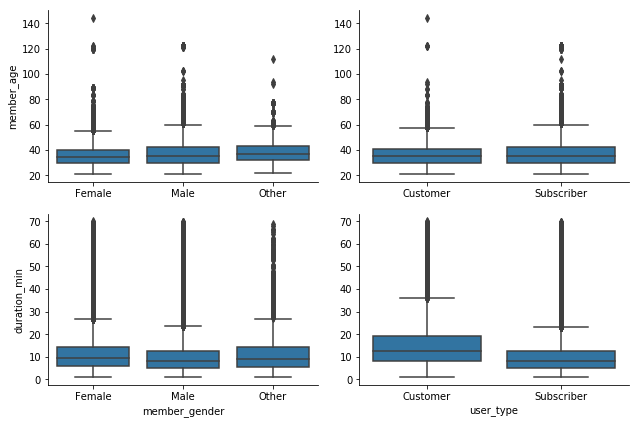

In [27]:
#Creating a matrix plot to view numeric against catgorical data
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = sample, y_vars = [ 'member_age', 'duration_min'], x_vars = categoric_vars, size = 3, aspect = 1.5)
g.map(boxgrid);

<span style="color:red">This clearly informs that the average age of all gender and customer category is less that 40 yrs albeit several outliers present in the dataset.</span>  
    
<span style="color:green"> From the gender point of view, average trip duration is less than 10 minutes albeit several outlier present in the distribution. From the user_type point of view, average trip druation for customer category is over 10 minutes while that od the subscriber category are less than 10 minutes.</span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

`DRURATION('duration_min' Vs 'member_age')`
- <span style="color:blue">The relationship between age and trip duration revealed that members of age 33 engaged in more trips as well as longer trip durations. </span>

`GENDER('duration_min' Vs 'member_gender')`
- <span style="color:blue">Surprisingly, the male gender spend lesser time on thier bike trips in comparison to other gender categories, alibeit being the predominant gender across the dataset. </span>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

`START AND END TIME('end_station_hr','start_station_hr' Vs 'duration_min')`
- <span style="color:blue">It is quite interesting to see that members mostly start their trip between hours close to 12 pm and another relationship between trip duration and end station time shows a larger number of people end their trips as the day progresses into late night . </span>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Multivariate Exploration<a id='multi'></a>


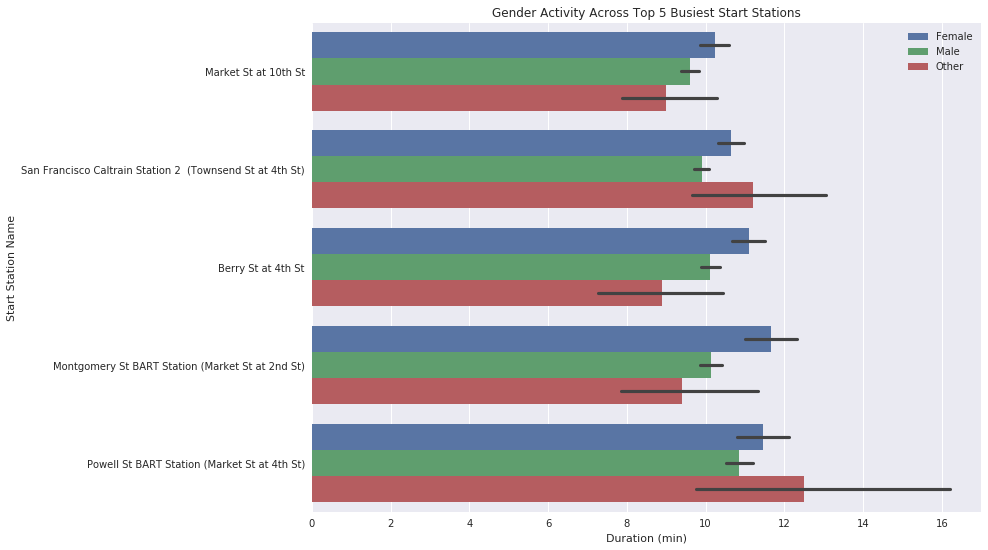

In [28]:
#Plotting a stacked barplot for gender category of busiest start stations by trip durations
sb.set(rc={"figure.figsize":(12, 9)})
station_order = sample['start_station_name'].value_counts().iloc[:5].index
sb.barplot(data = sample, x = 'duration_min', y = 'start_station_name', hue = 'member_gender', order = station_order)
plt.legend()

plt.ylabel('Start Station Name')
plt.xlabel('Duration (min)')
plt.title('Gender Activity Across Top 5 Busiest Start Stations');

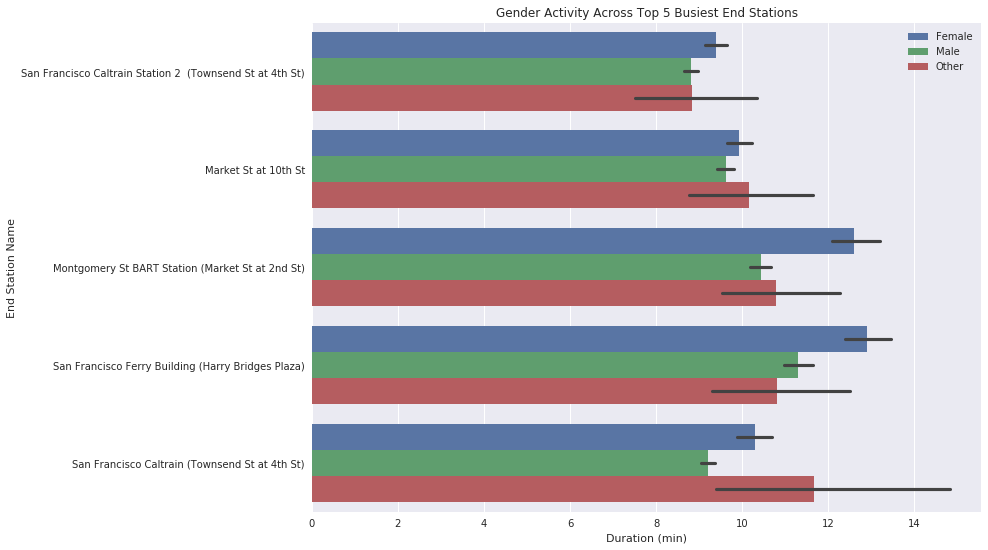

In [29]:
#Plotting a stacked barplot for gender category of busiest end stations by trip durations
sb.set(rc={"figure.figsize":(12, 9)})
station_order = sample['end_station_name'].value_counts().iloc[:5].index
sb.barplot(data = sample, x = 'duration_min', y = 'end_station_name', hue = 'member_gender', order = station_order)
plt.legend()
plt.ylabel('End Station Name')
plt.xlabel('Duration (min)')
plt.title('Gender Activity Across Top 5 Busiest End Stations');

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

`TOP_START&END_STATION`
- <span style="color:blue">For a majority of the busiest station, whether start or end, the male gender category seem to keep things busy the most.</span>

### Were there any interesting or surprising interactions between features?

`TOP_START_STATION`
- <span style="color:blue"> More male gender type in the dataset doesn't directly interprets to a dominance in all variables, this came as a surprise. Here in the top 5 busiest start stations, it can be seen that the Other gender category keeps the 'San Francisco Caltrain Station 2'  and 'Powell St BART Station (Market St at 4th St) stations the busiest in terms of trip durations at start stations.</span>

`TOP_END_STATION`
- <span style="color:blue">Similarly, the Other gender category kept 'Market St at 10th St' and 'San Francisco Caltrain Station 2  (Townsend St at 4th St)' stations most busy when it comes to the trip durations recorded for to five end stations as opposed to the male gender category.</span>



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Conclusions

- <span style="color:blue">Average trip duration for the entire dataset hovers around 10 minutes. Most people start their trips for the day at 8am while evening trips are mostly started at 5pm. A percentage of 75 male gender type dominate the data set and majority (95%)of the bike riders are Subscriber category user types. Over 50% of the Subscriber category users travel less than a total of 10 minutes while the Customer user types record more minutes during bike trips. </span>                                       
- <span style="color:blue">Users of age range 32 to 35 ride bikes the most and average age across all categories is below 40yrs.</span>
- <span style="color:blue">A surprising outcome is that the Other gender category took longer trips at some of the busiest stations, despite it being of the lowest percentage of gender type present in the dataset.</span>


In [30]:
# Converting my dataframe to a csv for later use such as the presentation slide decks
bikeshare.to_csv('bike_rides.csv',index=False, encoding = 'utf-8')